In [9]:
pip install pandas scikit-learn matplotlib seaborn 

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd

# Load dataset
file_path = 'C:\\Users\\91985\\Downloads\\Fuel_cell_performance_data-Full (1).csv'
data = pd.read_csv(file_path)

# Display dataset
data.head()


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Target1,Target2,Target3,Target4,Target5
0,52.9,1.33,49.1,37.13,129.43,35.0,0.281,112.7,207,0.55,98.971,2.87,1362,15.9,429,0.959,1.531,79.3,4.19,33.29
1,87.6,2.12,48.8,42.10,171.07,37.6,0.153,157.4,188,0.86,101.179,2.34,5130,26.1,1819,0.728,1.690,57.2,5.19,34.50
2,73.3,2.72,93.8,20.11,163.69,44.3,0.367,348.7,270,1.87,98.919,2.13,7811,16.7,1763,0.784,1.865,61.6,7.77,129.28
3,65.6,2.58,48.1,35.11,63.37,32.5,0.279,321.2,322,1.75,101.560,2.91,1641,32.1,203,0.884,1.920,71.3,8.40,186.65
4,39.6,2.58,49.3,32.93,63.40,47.0,0.149,205.6,203,1.55,98.148,1.93,7648,27.5,276,0.736,1.711,58.5,4.75,52.32


In [15]:
from sklearn.preprocessing import RobustScaler

# Target column
target_column = 'Target2'  # Replace with actual column name
features = data.drop(columns=[target_column])
target = data[target_column]

# Scale dataset
scaler = RobustScaler()
scaled_features = scaler.fit_transform(features)
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data[target_column] = target

# Display scaled and original datasets
scaled_data.head()


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Target1,Target3,Target4,Target5,Target2
0,-0.224390,-0.686275,-0.446870,0.393376,0.139555,-0.189691,0.231648,-0.915985,-0.115819,-0.941980,-0.360164,0.853333,-0.764038,-0.966581,-0.559360,1.193878,1.386581,-0.420852,-0.225832,1.531
1,0.904065,0.088235,-0.455604,0.644672,0.665446,0.024742,-0.603589,-0.604975,-0.223164,-0.518771,0.443111,0.146667,-0.020330,0.082262,0.830292,-1.163265,-1.437700,-0.166561,-0.203434,1.690
2,0.439024,0.676471,0.854440,-0.467198,0.572240,0.577320,0.792822,0.726039,0.240113,0.860068,-0.379081,-0.133333,0.508833,-0.884319,0.774306,-0.591837,-0.875399,0.489510,1.551020,1.865
3,0.188618,0.539216,-0.475983,0.291240,-0.694746,-0.395876,0.218597,0.534702,0.533898,0.696246,0.581719,0.906667,-0.708971,0.699229,-0.785304,0.428571,0.364217,0.649714,2.612985,1.920
4,-0.656911,0.539216,-0.441048,0.181014,-0.694367,0.800000,-0.629690,-0.269612,-0.138418,0.423208,-0.659573,-0.400000,0.476660,0.226221,-0.712322,-1.081633,-1.271565,-0.278449,0.126429,1.711


In [16]:
from sklearn.model_selection import train_test_split

# Original dataset splits (for Decision Tree, Random Forest)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    features, target, test_size=0.3, random_state=42
)

# Scaled dataset splits (for distance-based models)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    scaled_data.drop(columns=[target_column]), 
    scaled_data[target_column], 
    test_size=0.3, 
    random_state=42
)

# Linear Regression


Linear Regression - MSE: 0.06283738113659575, R2: 0.7843131561107856


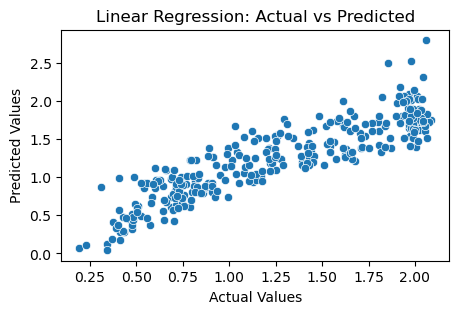

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_scaled)
lr_predictions = lr.predict(X_test_scaled)

# Metrics
lr_mse = mean_squared_error(y_test_scaled, lr_predictions)
lr_r2 = r2_score(y_test_scaled, lr_predictions)

# Display metrics
print(f"Linear Regression - MSE: {lr_mse}, R2: {lr_r2}")

# Plot
plt.figure(figsize=(5, 3))
sns.scatterplot(x=y_test_scaled, y=lr_predictions)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


# KNN Regression

KNN Regressor - MSE: 0.12118896906666665, R2: 0.5840236213002519


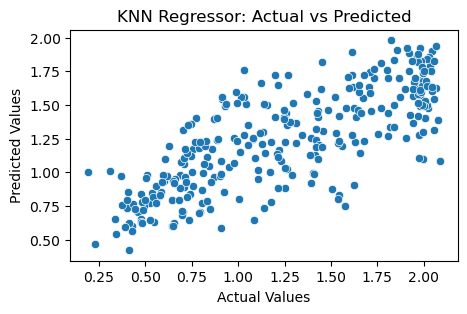

In [23]:
from sklearn.neighbors import KNeighborsRegressor

# Train KNN Regressor
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train_scaled)
knn_predictions = knn.predict(X_test_scaled)

# Metrics
knn_mse = mean_squared_error(y_test_scaled, knn_predictions)
knn_r2 = r2_score(y_test_scaled, knn_predictions)

# Display metrics
print(f"KNN Regressor - MSE: {knn_mse}, R2: {knn_r2}")

# Plot
plt.figure(figsize=(5, 3))
sns.scatterplot(x=y_test_scaled, y=knn_predictions)
plt.title('KNN Regressor: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


# Support Vector Regressor


SVR (RBF Kernel) - MSE: 0.04234696271575848, R2: 0.8546457129299929


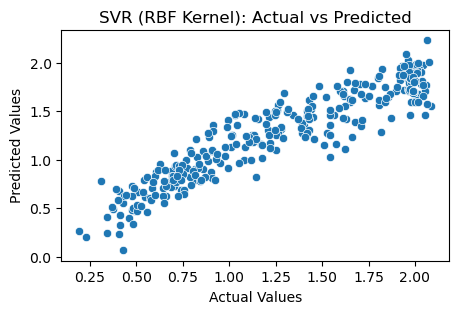

In [25]:
from sklearn.svm import SVR

# Train SVR with RBF kernel
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train_scaled, y_train_scaled)
svr_rbf_predictions = svr_rbf.predict(X_test_scaled)

# Metrics
svr_rbf_mse = mean_squared_error(y_test_scaled, svr_rbf_predictions)
svr_rbf_r2 = r2_score(y_test_scaled, svr_rbf_predictions)

# Display metrics
print(f"SVR (RBF Kernel) - MSE: {svr_rbf_mse}, R2: {svr_rbf_r2}")

# Plot
plt.figure(figsize=(5, 3))
sns.scatterplot(x=y_test_scaled, y=svr_rbf_predictions)
plt.title('SVR (RBF Kernel): Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


# Decision Tree


Decision Tree Regressor - MSE: 0.19923173333333333, R2: 0.3161448967481225


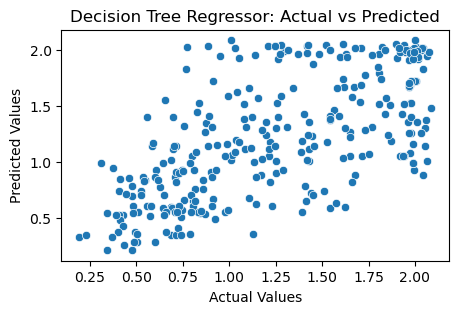

In [27]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_orig, y_train_orig)
dt_predictions = dt.predict(X_test_orig)

# Metrics
dt_mse = mean_squared_error(y_test_orig, dt_predictions)
dt_r2 = r2_score(y_test_orig, dt_predictions)

# Display metrics
print(f"Decision Tree Regressor - MSE: {dt_mse}, R2: {dt_r2}")

# Plot
plt.figure(figsize=(5, 3))
sns.scatterplot(x=y_test_orig, y=dt_predictions)
plt.title('Decision Tree Regressor: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


# Random Forest

Random Forest Regressor - MSE: 0.08513598442607405, R2: 0.7077740757154661


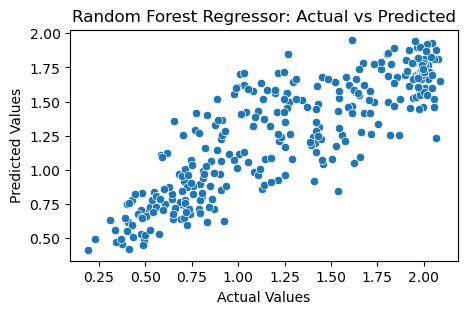

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(X_train_orig, y_train_orig)
rf_predictions = rf.predict(X_test_orig)

# Metrics
rf_mse = mean_squared_error(y_test_orig, rf_predictions)
rf_r2 = r2_score(y_test_orig, rf_predictions)

# Display metrics
print(f"Random Forest Regressor - MSE: {rf_mse}, R2: {rf_r2}")

# Plot
plt.figure(figsize=(5, 3))
sns.scatterplot(x=y_test_orig, y=rf_predictions)
plt.title('Random Forest Regressor: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [29]:
# Collect results
results = {
    'Linear Regression': {'MSE': lr_mse, 'R2': lr_r2},
    'KNN Regressor': {'MSE': knn_mse, 'R2': knn_r2},
    'SVR (RBF Kernel)': {'MSE': svr_rbf_mse, 'R2': svr_rbf_r2},
    'Decision Tree': {'MSE': dt_mse, 'R2': dt_r2},
    'Random Forest': {'MSE': rf_mse, 'R2': rf_r2},
}

# Identify best model
best_model_name = max(results, key=lambda k: results[k]['R2'])
best_model_r2 = results[best_model_name]['R2']

print(f"\nBest Model: {best_model_name} with R2 Score: {best_model_r2}")



Best Model: SVR (RBF Kernel) with R2 Score: 0.8546457129299929
